# Módulo 2: El workflow de pytorch

# 01. Fundamentos del Flujo de Trabajo en PyTorch

La esencia del aprendizaje automático y el aprendizaje profundo es tomar datos del pasado, construir un algoritmo (como una red neuronal) para descubrir patrones en ellos y usar los patrones descubiertos para predecir el futuro.

Hay muchas maneras de hacer esto, y constantemente se están descubriendo nuevas formas.

Pero empecemos con algo sencillo.

¿Qué tal si empezamos con una línea recta?

Y veamos si podemos construir un modelo de PyTorch que aprenda el patrón de la línea recta y lo reproduzca.
## Lo que vamos a cubrir

En este módulo vamos a abordar un flujo de trabajo estándar de PyTorch (se puede modificar según sea necesario, pero cubre los pasos principales).

<img src="https://fp.cloud.riberadeltajo.es/ia/workflow.png" width=900 alt="diagrama de flujo del trabajo en PyTorch"/>

Por ahora, utilizaremos este flujo de trabajo para predecir una simple línea recta, pero los pasos del flujo de trabajo se pueden repetir y modificar según el problema en el que estés trabajando.

Específicamente, vamos a cubrir:

| **Tema** | **Contenido** |
| ----- | ----- |
| **1. Preparar los datos** | Los datos pueden ser casi cualquier cosa, pero para comenzar vamos a crear una simple línea recta. |
| **2. Construir un modelo** | Aquí crearemos un modelo para aprender patrones en los datos, también elegiremos una **función de pérdida**, un **optimizador** y construiremos un **bucle de entrenamiento**. |
| **3. Ajustar el modelo a los datos (entrenamiento)** | Tenemos datos y un modelo, ahora dejemos que el modelo (intente) encontrar patrones en los datos (**entrenamiento**). |
| **4. Hacer predicciones y evaluar un modelo (inferencia)** | Nuestro modelo encontró patrones en los datos, comparemos sus hallazgos con los datos reales (**pruebas**). |
| **5. Guardar y cargar un modelo** | Es posible que desees usar tu modelo en otro lugar o volver a él más tarde, aquí cubriremos cómo hacerlo. |
| **6. Poner todo junto** | Tomemos todo lo anterior y combinémoslo. |


In [83]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Comprobar versión de pytorch
torch.__version__

'2.5.1'

## 1. Datos (preparación y carga)

Los "datos" en el aprendizaje automático pueden ser casi cualquier cosa que puedas imaginar. Una tabla de números (como una gran hoja de cálculo de Excel), imágenes de cualquier tipo, videos (¡YouTube tiene muchos datos!), archivos de audio como canciones o podcasts, estructuras de proteínas, texto y mucho más.

El aprendizaje automático es un juego de dos partes:  
1. Convierte tus datos, sean los que sean, en números (una representación).  
2. Elige o construye un modelo para aprender esa representación lo mejor posible.  

A veces, los pasos uno y dos se pueden hacer al mismo tiempo.

Pero, ¿qué pasa si no tienes datos?

Bueno, eso es justo donde estamos ahora.

No tenemos datos.

Pero podemos crearlos.

Vamos a crear nuestros datos como una línea recta.

Usaremos [regresión lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal) para crear los datos con **parámetros** conocidos (cosas que un modelo puede aprender) y luego usaremos PyTorch para ver si podemos construir un modelo que estime estos parámetros utilizando el [**descenso por gradiente**](https://es.wikipedia.org/wiki/M%C3%A9todo_de_descenso_de_gradiente).

No te preocupes si los términos anteriores no tienen mucho sentido ahora; los veremos en acción y proporcionaré recursos adicionales a continuación para que puedas aprender más.


In [84]:
# Crear parámetros
weight = 0.7
bias = 0.3

# Creamos datos
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Dividir los datos en conjuntos de entrenamiento y prueba

Tenemos algunos datos.

Pero antes de construir un modelo, necesitamos dividirlos.

Uno de los pasos más importantes en un proyecto de aprendizaje automático es crear un conjunto de entrenamiento y un conjunto de prueba (y, cuando sea necesario, un conjunto de validación).

Cada división del conjunto de datos tiene un propósito específico:

| División | Propósito | Porcentaje del total de datos | ¿Con qué frecuencia se usa? |
| ----- | ----- | ----- | ----- |
| **Conjunto de entrenamiento** | El modelo aprende a partir de estos datos (como los materiales de estudio durante el semestre). | ~60-80% | Siempre |
| **Conjunto de validación** | El modelo se ajusta utilizando estos datos (como el examen de práctica antes del examen final). | ~10-20% | Frecuentemente, pero no siempre |
| **Conjunto de prueba** | El modelo se evalúa con estos datos para verificar lo que ha aprendido (como el examen final al final del semestre). | ~10-20% | Siempre |

Por ahora, solo usaremos un conjunto de entrenamiento y un conjunto de prueba. Esto significa que tendremos un conjunto de datos para que nuestro modelo aprenda y otro para ser evaluado.

Podemos crearlos dividiendo nuestros tensores `X` y `y`.

> **Nota:** Al trabajar con datos del mundo real, este paso generalmente se realiza al inicio de un proyecto (el conjunto de prueba siempre debe mantenerse separado de los demás datos). Queremos que nuestro modelo aprenda a partir de los datos de entrenamiento y luego evaluarlo en los datos de prueba para obtener una indicación de qué tan bien se **generaliza** a ejemplos no vistos.


In [85]:
# Crear conjuntos de train y test
train_split = int(0.8 * len(X)) # 80% train, 20% test
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Tenemos 40 muestras para entrenamiento (`X_train` y `y_train`) y 10 muestras para prueba (`X_test` y `y_test`).

El modelo que crearemos intentará aprender la relación entre `X_train` y `y_train`, y luego evaluaremos lo que ha aprendido utilizando `X_test` y `y_test`.

Pero por ahora, nuestros datos son solo números en una hoja.

Vamos a crear una función para visualizarlos.


In [86]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Dibuja los datos de training y test data y compara las predicciones
  """
  plt.figure(figsize=(10, 7))

  # training en azul
  plt.scatter(train_data, train_labels, c="b", s=4, label="training")

  # test en verde
  plt.scatter(test_data, test_labels, c="g", s=4, label="test")

  if predictions is not None:
    # predicciones en rojo
    plt.scatter(test_data, predictions, c="r", s=4, label="Predicciones")

  plt.legend(prop={"size": 14});

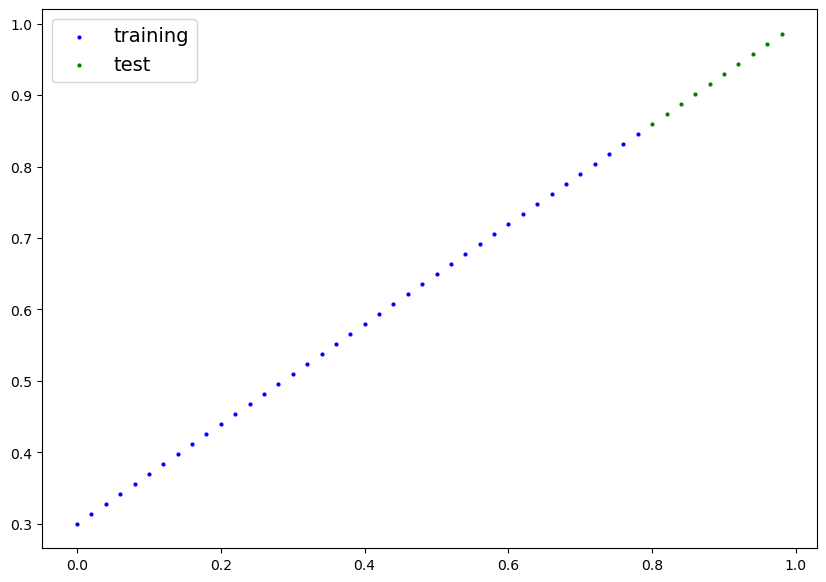

In [87]:
# muestra los datos con la función anterior
plot_predictions()


Ahora, en lugar de ser solo números en una hoja, nuestros datos forman una línea recta.

> **Nota:** "¡visualiza, visualiza, visualiza!"  
>
> Ten esto en mente siempre que trabajes con datos y los conviertas en números: si puedes visualizar algo, puede hacer maravillas para tu comprensión.
>
> A las máquinas les encantan los números, y a nosotros, los humanos, también nos gustan, pero también nos gusta observar las cosas.


## 2. Construir un modelo

Ahora que tenemos algunos datos, construyamos un modelo para usar los puntos azules y predecir los puntos verdes.

Vamos a ir directo al grano.

Escribiremos el código primero y luego explicaremos todo.

Vamos a replicar un modelo estándar de regresión lineal utilizando únicamente PyTorch.


In [88]:
# Crea una clase de modelo de Regresión Lineal con dos parámetros (weights y bias)
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

# define la función forward usando como fórmula la self.weights * x + self.bias, donde x es la entrada a la red
    def forward(self, x):
        return self.weights * x + self.bias

Muy bien, hay bastante sucediendo en el código anterior, pero vamos a desglosarlo paso a paso.

> **Recurso:** Usaremos clases de Python para crear componentes para construir redes neuronales. Si no estás familiarizado con la notación de clases en Python, te recomendaría leer [la guía de programación orientada a objetos en Python 3 de Real Python](https://realpython.com/python3-object-oriented-programming/) varias veces.




### Elementos esenciales para construir modelos en PyTorch

PyTorch tiene cuatro (más o menos) módulos esenciales que puedes usar para crear casi cualquier tipo de red neuronal que puedas imaginar.

Estos son [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) y [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). Por ahora, nos enfocaremos en los dos primeros y abordaremos los otros más adelante (aunque quizás puedas adivinar qué hacen).

| Módulo de PyTorch | ¿Qué hace? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contiene todos los bloques de construcción para grafos computacionales (esencialmente una serie de cálculos ejecutados de una manera específica). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Almacena tensores que pueden ser usados con `nn.Module`. Si `requires_grad=True`, los gradientes (usados para actualizar los parámetros del modelo mediante [**descenso por gradiente**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)) se calculan automáticamente; esto se conoce comúnmente como "autograd". |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | La clase base para todos los módulos de redes neuronales; todos los bloques de construcción de redes neuronales son subclases. Si estás construyendo una red neuronal en PyTorch, tus modelos deberían ser subclases de `nn.Module`. Requiere que se implemente un método `forward()`. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contiene varios algoritmos de optimización (estos indican a los parámetros del modelo almacenados en `nn.Parameter` cómo cambiar para mejorar el descenso por gradiente y, a su vez, reducir la pérdida). |
| `def forward()` | Todas las subclases de `nn.Module` requieren un método `forward()`, que define el cálculo que se realizará en los datos pasados al `nn.Module` en cuestión (por ejemplo, la fórmula de regresión lineal vista antes). |

Si lo anterior parece complejo, piénsalo de esta manera: casi todo en una red neuronal de PyTorch proviene de `torch.nn`:
* `nn.Module` contiene los bloques más grandes (capas).
* `nn.Parameter` contiene los parámetros más pequeños como pesos y sesgos (combínalos para crear `nn.Module`(s)).
* `forward()` indica a los bloques más grandes cómo realizar cálculos en los datos de entrada (tensores llenos de datos) dentro de `nn.Module`(s).
* `torch.optim` contiene métodos de optimización para mejorar los parámetros dentro de `nn.Parameter` y representar mejor los datos de entrada.

> **Recurso:** Consulta más sobre estos módulos esenciales y sus casos de uso en la [Hoja de trucos de PyTorch](https://pytorch.org/tutorials/beginner/ptcheat.html).



### Verificando el contenido de un modelo en PyTorch

Ahora que hemos aclarado estos conceptos, vamos a crear una instancia del modelo con la clase que hemos creado y verificar sus parámetros utilizando [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters).


In [89]:
# 1. Configura una semilla manual ya que nn.Parameter se inicializa aleatoriamente
torch.manual_seed(42)

# 2. Crea una instancia del modelo (esta es una subclase de nn.Module que contiene nn.Parameter(s))
model_0 = LinearRegressionModel()

# 3. Verificar, con list(model_0.parameters) los nn.Parameter(s) dentro de la subclase nn.Module que creamos
for param in list(model_0.parameters()):
    print(param)

Parameter containing:
tensor([0.3367], requires_grad=True)
Parameter containing:
tensor([0.1288], requires_grad=True)


También podemos obtener el estado (lo que contiene el modelo) del modelo utilizando [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).


In [90]:
# Lista los nombres de parámetros usando state_dict()
for name in model_0.state_dict():
    print(name)

weights
bias


¿Notaste cómo los valores de `weights` y `bias` en `model_0.state_dict()` aparecen como tensores de números flotantes aleatorios?

Esto se debe a que los inicializamos anteriormente usando `torch.randn()`.

Esencialmente, queremos comenzar con parámetros aleatorios y hacer que el modelo los actualice hacia parámetros que se ajusten mejor a nuestros datos (los valores de `weight` y `bias` que establecimos al crear nuestros datos de línea recta).

> **Ejercicio:** Intenta cambiar el valor de `torch.manual_seed()` dos celdas arriba y observa qué sucede con los valores de weights y bias.

Debido a que nuestro modelo comienza con valores aleatorios, por ahora tendrá un bajo poder predictivo.




In [91]:
torch.manual_seed(123)
model_1 = LinearRegressionModel()
print(model_1.state_dict())

OrderedDict({'weights': tensor([-0.1115]), 'bias': tensor([0.1204])})


- Cuando cambiamos torch.manual_seed(), los valores de weight y bias del modelo también cambian.

### Realizando predicciones usando `torch.inference_mode()`

Para verificar esto, podemos pasarle los datos de prueba `X_test` y observar qué tan cerca está de predecir `y_test`.

Cuando pasamos datos a nuestro modelo, estos pasarán por el método `forward()` del modelo y producirán un resultado utilizando el cálculo que hemos definido.

Hagamos algunas predicciones.


In [92]:
# Haz predicciones con el modelo. 1º pon el inference_mode y luego, invoca al callable del modelo0 pasando X_test como parámetro
with torch.inference_mode():
    y_preds = model_0(X_test)

Probablemente notaste que usamos [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) como un [administrador de contexto](https://realpython.com/python-with-statement/) (eso es lo que significa `with torch.inference_mode():`) para realizar las predicciones.

Como su nombre lo indica, `torch.inference_mode()` se utiliza cuando usamos un modelo para inferencia (hacer predicciones).

`torch.inference_mode()` desactiva varias cosas (como el seguimiento de gradientes, que es necesario para el entrenamiento pero no para la inferencia) para que las **pasadas hacia adelante** (el paso de datos a través del método `forward()`) sean más rápidas.

> **Nota:** En código más antiguo de PyTorch, también podrías ver que se utiliza `torch.no_grad()` para la inferencia. Aunque `torch.inference_mode()` y `torch.no_grad()` hacen cosas similares, `torch.inference_mode()` es más reciente, potencialmente más rápido y es la opción preferida. Consulta este [Tweet de PyTorch](https://twitter.com/PyTorch/status/1437838231505096708?s=20) para más información.

Hemos hecho algunas predicciones, veamos qué pinta tienen.


In [93]:
print(f"Número de muestras de test: {len(X_test)}")
print(f"Número de predicciones: {len(y_preds)}")
print(f"Valores predichos:\n{y_preds}")

Número de muestras de test: 10
Número de predicciones: 10
Valores predichos:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


Nota cómo hay un valor de predicción por cada muestra de prueba.

Esto se debe al tipo de datos que estamos utilizando. Para nuestra línea recta, un valor de `X` se asigna a un valor de `y`.

Sin embargo, los modelos de aprendizaje automático son muy flexibles. Podrías tener 100 valores de `X` asignándose a uno, dos, tres o incluso 10 valores de `y`. Todo depende de lo que estés trabajando.

Nuestras predicciones siguen siendo números en una hoja, así que vamos a visualizarlas con nuestra función `plot_predictions()` que creamos anteriormente.


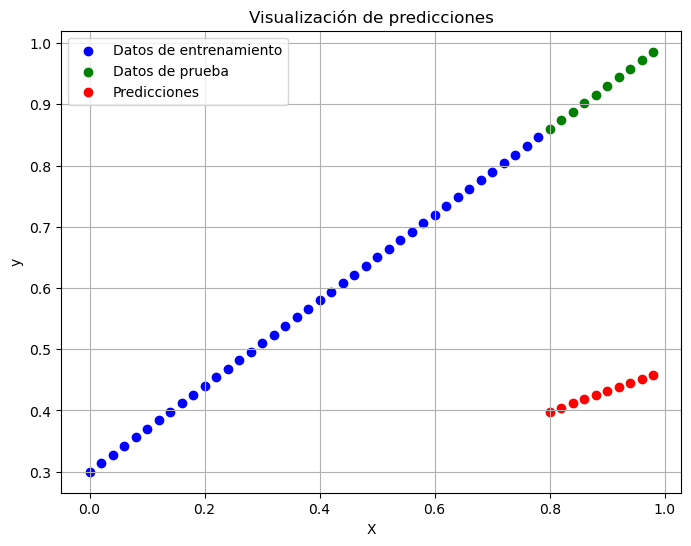

In [94]:
# con la función plot_predictions muestra los datos de entrenamiento,
# los de test y las predicciones que has hecho sobre los datos de test
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(8, 6))
    
    plt.scatter(train_data, train_labels, c="blue", label="Datos de entrenamiento")

    plt.scatter(test_data, test_labels, c="green", label="Datos de prueba")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="red", label="Predicciones")
    
    plt.legend()
    plt.title("Visualización de predicciones")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
    
plot_predictions(predictions=y_preds)

In [95]:
# mide la diferencia entre y_test y las predicciones (y_test - y_preds)
error = y_test - y_preds
print("Diferencia entre y_test - y_preds:")
print(error)

Diferencia entre y_test - y_preds:
tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])


Esas predicciones tienen muy mala pinta

Sin embargo, esto tiene sentido si recuerdas que nuestro modelo solo está usando valores de parámetros aleatorios para hacer predicciones.

Ni siquiera ha mirado los puntos azules para intentar predecir los puntos verdes.

Es hora de cambiar eso.


## 3. Entrenar el modelo

En este momento, nuestro modelo está haciendo predicciones utilizando parámetros aleatorios para realizar cálculos, básicamente está adivinando (de manera aleatoria).

Para solucionar esto, podemos actualizar sus parámetros internos (también me refiero a *parámetros* como patrones), los valores de `weights` y `bias` que establecimos aleatoriamente utilizando `nn.Parameter()` y `torch.randn()`, para que representen mejor los datos.

Podríamos codificar esto manualmente (ya que conocemos los valores predeterminados `weight=0.7` y `bias=0.3`), pero ¿dónde estaría la diversión en eso?

La mayor parte del tiempo no sabrás cuáles son los parámetros ideales para un modelo.

En su lugar, es mucho más divertido escribir código para ver si el modelo puede intentar descubrirlos por sí mismo.




### Creando una función de pérdida y un optimizador en PyTorch

Para que nuestro modelo actualice sus parámetros por sí mismo, necesitamos agregar algunos elementos más a nuestra receta.

Eso incluye una **función de pérdida** y un **optimizador**.

Sus roles son:

| Función | ¿Qué hace?                                                                                                                                                             | ¿Dónde vive en PyTorch? | Valores comunes |
| ----- |------------------------------------------------------------------------------------------------------------------------------------------------------------------------| ----- | ----- |
| **Función de pérdida** | Mide cómo de malas son las predicciones de tu modelo (por ejemplo, `y_preds`) en comparación con las etiquetas reales (por ejemplo, `y_test`). Cuanto más baja, mejor. | PyTorch tiene muchas funciones de pérdida integradas en [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Error absoluto medio (MAE) para problemas de regresión ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Entropía cruzada binaria para problemas de clasificación binaria ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)). |
| **Optimizador** | Indica a tu modelo cómo actualizar sus parámetros internos para reducir la pérdida.                                                                                    | Puedes encontrar varias implementaciones de funciones de optimización en [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Descenso por gradiente estocástico ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Optimizador Adam ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

Vamos a crear una función de pérdida y un optimizador que nos ayuden a mejorar nuestro modelo.

El tipo de función de pérdida y optimizador que uses dependerá del problema en el que estés trabajando.

Sin embargo, hay algunos valores comunes que se sabe que funcionan bien, como el optimizador SGD (descenso por gradiente estocástico) o Adam, y la función de pérdida MAE (error absoluto medio) para problemas de regresión (predicción de un número) o la función de pérdida de entropía cruzada binaria para problemas de clasificación (predecir una cosa u otra).

En nuestro caso, como estamos prediciendo un número, usaremos MAE (que está en `torch.nn.L1Loss()`) en PyTorch como nuestra función de pérdida.

*El error absoluto medio (MAE, en PyTorch: `torch.nn.L1Loss`) mide la diferencia absoluta entre dos puntos (predicciones y etiquetas) y luego toma el promedio entre todos los ejemplos.*


Usaremos SGD, `torch.optim.SGD(params, lr)`, donde:

- `params` son los parámetros del modelo que deseas optimizar (por ejemplo, los valores de `weights` y `bias` que configuramos aleatoriamente antes).
- `lr` es la **tasa de aprendizaje** con la que deseas que el optimizador actualice los parámetros. Un valor más alto significa que el optimizador intentará actualizaciones más grandes (que a veces pueden ser demasiado grandes y hacer que el optimizador falle), mientras que un valor más bajo significa que intentará actualizaciones más pequeñas (que pueden ser demasiado pequeñas y tardar mucho en encontrar los valores ideales). La tasa de aprendizaje se considera un **hiperparámetro** (porque es configurada por un ingeniero de aprendizaje automático). Valores iniciales comunes para la tasa de aprendizaje son `0.01`, `0.001`, `0.0001`, aunque también se pueden ajustar con el tiempo (esto se llama [programación de tasa de aprendizaje](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

Es mucha información, veámoslo en código.

In [96]:
# Crea la función de pérdida (utiliza L1Loss() que es igual que MAE
loss_fn = torch.nn.L1Loss()

# Crea el optimizador, utiliza torch.optim.SGD y un learning_rate de 0.01 (lr)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### Creando un bucle de optimización en PyTorch

## Bucle de entrenamiento en PyTorch
Para el bucle de entrenamiento, construiremos los siguientes pasos:

| Número | Nombre del paso | ¿Qué hace? | Ejemplo de código |
| ----- | ----- | ----- | ----- |
| 1 | Paso hacia adelante (Forward pass) | El modelo pasa por todos los datos de entrenamiento una vez, ejecutando los cálculos de su función `forward()`. | `model(x_train)` |
| 2 | Calcular la pérdida | Las salidas del modelo (predicciones) se comparan con la verdad real (ground truth) y se evalúan para ver qué tan incorrectas están. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Reiniciar gradientes | Los gradientes del optimizador se reinician a cero (por defecto se acumulan) para que puedan recalcularse en este paso específico de entrenamiento. | `optimizer.zero_grad()` |
| 4 | Realizar retropropagación en la pérdida | Calcula el gradiente de la pérdida con respecto a cada parámetro del modelo que será actualizado (cada parámetro con `requires_grad=True`). Esto se conoce como **retropropagación**, de ahí "hacia atrás". | `loss.backward()` |
| 5 | Actualizar el optimizador (**descenso por gradiente**) | Actualiza los parámetros con `requires_grad=True` basándose en los gradientes de la pérdida para mejorarlos. | `optimizer.step()` |

> **Nota:** Lo anterior es solo un ejemplo de cómo se podrían ordenar o describir los pasos. Con experiencia, descubrirás que los bucles de entrenamiento en PyTorch pueden ser bastante flexibles.
>
> En cuanto al orden de los pasos, el anterior es un buen orden predeterminado, pero podrías ver ligeras variaciones. Algunas reglas generales:
> * Calcula la pérdida (`loss = ...`) *antes* de realizar la retropropagación en ella (`loss.backward()`).
> * Reinicia los gradientes (`optimizer.zero_grad()`) *antes* de calcular los gradientes de la pérdida con respecto a cada parámetro del modelo (`loss.backward()`).
> * Actualiza el optimizador (`optimizer.step()`) *después* de realizar la retropropagación en la pérdida (`loss.backward()`).

Para recursos adicionales que ayuden a entender lo que ocurre detrás de escena con la retropropagación y el descenso por gradiente, consulta la sección de currículo adicional.


### Bucle de prueba en PyTorch

En cuanto al bucle de prueba (evaluar nuestro modelo), los pasos típicos incluyen:

| Número | Nombre del paso | ¿Qué hace? | Ejemplo de código |
| ----- | ----- | ----- | ----- |
| 1 | Paso hacia adelante (Forward pass) | El modelo pasa por todos los datos de prueba una vez, ejecutando los cálculos de su función `forward()`. | `model(x_test)` |
| 2 | Calcular la pérdida | Las salidas del modelo (predicciones) se comparan con la verdad real (ground truth) y se evalúan para ver qué tan incorrectas están. | `loss = loss_fn(y_pred, y_test)` |
| 3 | Calcular métricas de evaluación (opcional) | Además del valor de la pérdida, es posible que desees calcular otras métricas de evaluación, como la precisión en el conjunto de prueba. | Funciones personalizadas |

Nota que el bucle de prueba no incluye realizar retropropagación (`loss.backward()`) ni actualizar el optimizador (`optimizer.step()`), ya que no se están cambiando los parámetros del modelo durante la prueba; estos ya han sido calculados. En la prueba, solo nos interesa la salida del paso hacia adelante a través del modelo.

Vamos a juntar todo lo anterior y entrenar nuestro modelo durante 100 **épocas** (pasos hacia adelante a través de los datos) y lo evaluaremos cada 10 épocas.


In [97]:
torch.manual_seed(42)

# Establecer el número de épocas (cuántas veces el modelo pasará sobre los datos de entrenamiento)
epochs = 100

# Crear listas vacías para rastrear los valores de la pérdida
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Entrenamiento

    # Poner el modelo en modo de entrenamiento (este es el estado predeterminado de un modelo)
    model_0.train()

    # 1. Paso hacia adelante con los datos de entrenamiento usando el método forward()
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calcular la pérdida (qué tan diferentes son las predicciones de nuestro modelo con respecto a la verdad real)
    loss = loss_fn(y_pred, y_train)

    # 3. Reiniciar los gradientes del optimizador
    optimizer.zero_grad()

    # 4. Retropropagación de la pérdida
    loss.backward()

    # 5. Actualizar los parámetros del modelo con el optimizador
    optimizer.step()

    ### Prueba

    # Poner el modelo en modo de evaluación
    model_0.eval()

    with torch.inference_mode():
        # 1. Paso hacia adelante con los datos de prueba
        test_pred = model_0(X_test)

        # 2. Calcular la pérdida en los datos de prueba
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # las predicciones vienen en formato torch.float, así que las comparaciones deben hacerse con tensores del mismo tipo

        # Imprimir lo que está ocurriendo
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Época: {epoch} | MAE [train]: {loss} | MAE [test]: {test_loss} ")


Época: 0 | MAE [train]: 0.31288138031959534 | MAE [test]: 0.48106518387794495 
Época: 10 | MAE [train]: 0.1976713240146637 | MAE [test]: 0.3463551998138428 
Época: 20 | MAE [train]: 0.08908725529909134 | MAE [test]: 0.21729660034179688 
Época: 30 | MAE [train]: 0.053148526698350906 | MAE [test]: 0.14464017748832703 
Época: 40 | MAE [train]: 0.04543796554207802 | MAE [test]: 0.11360953003168106 
Época: 50 | MAE [train]: 0.04167863354086876 | MAE [test]: 0.09919948130846024 
Época: 60 | MAE [train]: 0.03818932920694351 | MAE [test]: 0.08886633068323135 
Época: 70 | MAE [train]: 0.03476089984178543 | MAE [test]: 0.0805937647819519 
Época: 80 | MAE [train]: 0.03132382780313492 | MAE [test]: 0.07232122868299484 
Época: 90 | MAE [train]: 0.02788739837706089 | MAE [test]: 0.06473556160926819 


Parece que la pérdida disminuye en cada época, echemos un vistazo

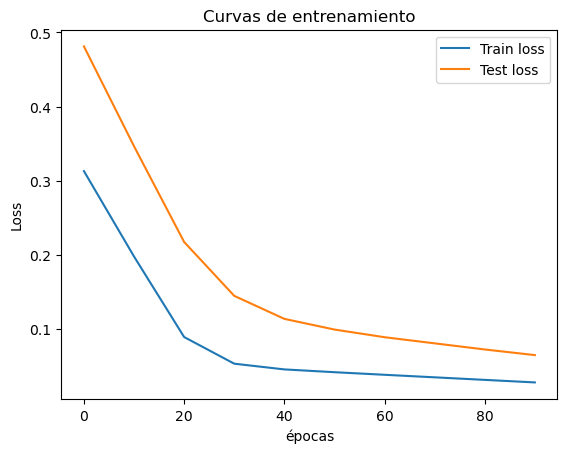

In [98]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Curvas de entrenamiento")
plt.ylabel("Loss")
plt.xlabel("épocas")
plt.legend();

¡Genial! Las **curvas de pérdida** muestran cómo la pérdida disminuye con el tiempo. Recuerda, la pérdida es una medida de cómo de *incorrecto* es tu modelo, por lo que cuanto más baja, mejor.

¿Pero por qué disminuyó la pérdida?

Gracias a nuestra función de pérdida y optimizador, los parámetros internos del modelo (`weights` y `bias`) se actualizaron para reflejar mejor los patrones subyacentes en los datos.

Vamos a inspeccionar el [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html) de nuestro modelo para ver qué cómo de cerca está nuestro modelo de los valores originales que establecimos para `weights` y `bias`.


In [99]:
# Encontrar los parámetros aprendidos por nuestro modelo
print("El modelo aprendió los siguientes valores para weights y bias:")
print(model_0.state_dict())
print("\nY los valores originales para weights y bias son:")
print(f"weights: {weight}, bias: {bias}")


El modelo aprendió los siguientes valores para weights y bias:
OrderedDict({'weights': tensor([0.5784]), 'bias': tensor([0.3513])})

Y los valores originales para weights y bias son:
weights: 0.7, bias: 0.3


Nuestro modelo se acercó mucho a calcular los valores originales exactos para `weight` y `bias` (y probablemente se acercaría aún más si lo entrenáramos durante más tiempo).

> **Ejercicio:** Intenta cambiar el valor de `epochs` arriba a 200. ¿Qué sucede con las curvas de pérdida y los valores de los parámetros `weights` y `bias` del modelo?

Es probable que nunca los adivine *perfectamente* (especialmente cuando se usan conjuntos de datos más complejos), pero eso está bien; a menudo puedes lograr cosas muy interesantes con una aproximación cercana.

Esta es toda la idea del aprendizaje automático y profundo: **existen valores ideales que describen nuestros datos** y, en lugar de descubrirlos manualmente, **podemos entrenar un modelo para que los descubra de manera programada**.


- La pérdida de entrenamiento y prueba disminuyó entre la epoca 60 y 70.

Época: 0 | MAE [train]: 0.024458957836031914 | MAE [test]: 0.05646304413676262 
Época: 10 | MAE [train]: 0.021020207554101944 | MAE [test]: 0.04819049686193466 
Época: 20 | MAE [train]: 0.01758546568453312 | MAE [test]: 0.04060482233762741 
Época: 30 | MAE [train]: 0.014155393466353416 | MAE [test]: 0.03233227878808975 
Época: 40 | MAE [train]: 0.010716589167714119 | MAE [test]: 0.024059748277068138 
Época: 50 | MAE [train]: 0.0072835334576666355 | MAE [test]: 0.016474086791276932 
Época: 60 | MAE [train]: 0.0038517764769494534 | MAE [test]: 0.008201557211577892 
Época: 70 | MAE [train]: 0.008932482451200485 | MAE [test]: 0.005023092031478882 
Época: 80 | MAE [train]: 0.008932482451200485 | MAE [test]: 0.005023092031478882 
Época: 90 | MAE [train]: 0.008932482451200485 | MAE [test]: 0.005023092031478882 
Época: 100 | MAE [train]: 0.008932482451200485 | MAE [test]: 0.005023092031478882 
Época: 110 | MAE [train]: 0.008932482451200485 | MAE [test]: 0.005023092031478882 
Época: 120 | MAE [

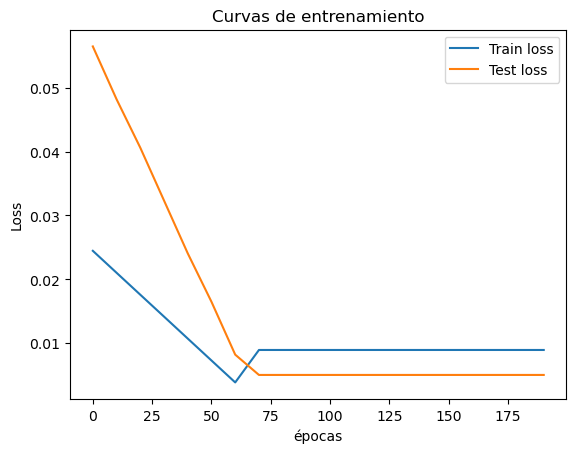

In [115]:
torch.manual_seed(42)

# Establecer el número de épocas (cuántas veces el modelo pasará sobre los datos de entrenamiento)
epochs = 200

# Crear listas vacías para rastrear los valores de la pérdida
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Entrenamiento

    # Poner el modelo en modo de entrenamiento (este es el estado predeterminado de un modelo)
    model_0.train()

    # 1. Paso hacia adelante con los datos de entrenamiento usando el método forward()
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calcular la pérdida (qué tan diferentes son las predicciones de nuestro modelo con respecto a la verdad real)
    loss = loss_fn(y_pred, y_train)

    # 3. Reiniciar los gradientes del optimizador
    optimizer.zero_grad()

    # 4. Retropropagación de la pérdida
    loss.backward()

    # 5. Actualizar los parámetros del modelo con el optimizador
    optimizer.step()

    ### Prueba

    # Poner el modelo en modo de evaluación
    model_0.eval()

    with torch.inference_mode():
        # 1. Paso hacia adelante con los datos de prueba
        test_pred = model_0(X_test)

        # 2. Calcular la pérdida en los datos de prueba
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # las predicciones vienen en formato torch.float, así que las comparaciones deben hacerse con tensores del mismo tipo

        # Imprimir lo que está ocurriendo
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Época: {epoch} | MAE [train]: {loss} | MAE [test]: {test_loss} ")

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Curvas de entrenamiento")
plt.ylabel("Loss")
plt.xlabel("épocas")
plt.legend();


## 4. Realizando predicciones con un modelo entrenado de PyTorch (inferencia)

Una vez que has entrenado un modelo, probablemente querrás hacer predicciones con él.

Ya hemos visto un adelanto de esto en el código de entrenamiento y prueba anterior; los pasos para hacerlo fuera del bucle de entrenamiento/prueba son similares.

Hay tres cosas que recordar al realizar predicciones (también llamado realizar inferencia) con un modelo de PyTorch:

1. Configura el modelo en modo de evaluación (`model.eval()`).
2. Realiza las predicciones usando el administrador de contexto para el modo de inferencia (`with torch.inference_mode(): ...`).
3. Todas las predicciones deben realizarse con objetos en el mismo dispositivo (por ejemplo, datos y modelo en GPU o datos y modelo en CPU).

Los dos primeros puntos aseguran que todos los cálculos y configuraciones útiles que PyTorch utiliza tras bambalinas durante el entrenamiento, pero que no son necesarios para la inferencia, se desactiven (esto resulta en un cálculo más rápido). Y el tercer punto asegura que no te enfrentarás a errores por dispositivos cruzados.


In [123]:
# 1. Poner el modelo en modo de evaluación
model_0.eval()

# 2. Realiza las predicciones en modo torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

Vale, ahora veamos qué pinta tienen las predicciones

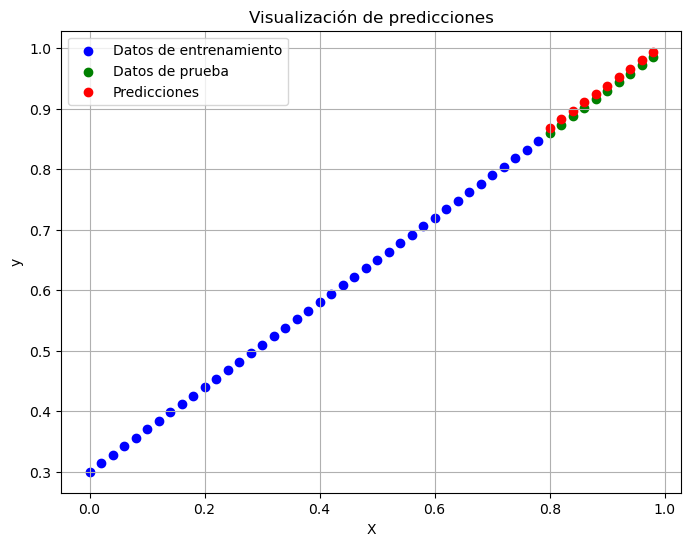

In [124]:
# imprime de nuevo los datos de training, los de test y las predicciones
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test, predictions=y_preds)

Pues parece que nos hemos aproximado bastante!


## 5. Cargar y guardar un modelo en PyTorch

Si has entrenado un modelo en PyTorch, lo más probable es que desees guardarlo y exportarlo a algún lugar.

Por ejemplo, podrías entrenarlo en Google Colab o en tu máquina local con una GPU, pero luego querrías exportarlo a algún tipo de aplicación donde otros puedan usarlo.

O tal vez desees guardar tu progreso en un modelo y volver a cargarlo más tarde.

Para guardar y cargar modelos en PyTorch, hay tres métodos principales que deberías conocer (todos ellos están tomados de la [guía de guardar y cargar modelos en PyTorch](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| Método de PyTorch | ¿Qué hace? |
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Guarda un objeto serializado en el disco utilizando la utilidad [`pickle`](https://docs.python.org/3/library/pickle.html) de Python. Los modelos, tensores y otros objetos de Python como diccionarios pueden guardarse con `torch.save`. |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Usa las funciones de deserialización de `pickle` para cargar archivos de objetos serializados de Python (como modelos, tensores o diccionarios) en memoria. También puedes especificar en qué dispositivo cargar el objeto (CPU, GPU, etc.). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Carga el diccionario de parámetros de un modelo (`model.state_dict()`) usando un objeto `state_dict()` guardado previamente. |

> **Nota:** Como se indica en la [documentación de `pickle` de Python](https://docs.python.org/3/library/pickle.html), el módulo `pickle` **no es seguro**. Esto significa que solo debes deserializar (cargar) datos en los que confíes. Esto también aplica a cargar modelos de PyTorch. Solo utiliza modelos de PyTorch guardados de fuentes confiables.


### Guardando el `state_dict()` de un modelo en PyTorch

La [forma recomendada](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) de guardar y cargar un modelo para inferencia (hacer predicciones) es guardando y cargando el `state_dict()` del modelo.

Veamos cómo podemos hacerlo en unos pocos pasos:

1. Crearemos un directorio para guardar los modelos llamado `models` utilizando el módulo `pathlib` de Python.
2. Crearemos una ruta de archivo donde guardar el modelo.
3. Llamaremos a `torch.save(obj, f)`, donde `obj` es el `state_dict()` del modelo objetivo y `f` es el nombre del archivo donde guardar el modelo.

> **Nota:** Es una convención común que los modelos o objetos guardados en PyTorch terminen con `.pt` o `.pth`, como `saved_model_01.pth`.



In [174]:
from pathlib import Path

# 1. Crear un directorio para los modelos
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Crear la ruta para guardar el modelo
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Guardar el state_dict del modelo
print(f"Guardando el modelo en: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # guardar solo el state_dict() guarda únicamente los parámetros aprendidos del modelo
           f=MODEL_SAVE_PATH)


Guardando el modelo en: models\01_pytorch_workflow_model_0.pth


In [ ]:
# Comprobar que el modelo está ahí
# !ls -l models/01_pytorch_workflow_model_0.pth

# o en windows :(
!dir models\01_pytorch_workflow_model_0.pth

# He tenido que hacerlo desde Python, me sale un error
print("\nDesde Python: \n")
for file in MODEL_PATH.iterdir():
    print(file.name)


 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: AC05-173B

 Directorio de c:\Users\Buhardilla\OneDrive\Documentos\Curso IA y Big Data Git\Programacion de Inteligencia Artificial\2EV\Tema 6\Python\Ejercicios\Pytorch Workflow\models

08/05/2025  21:00             1.680 01_pytorch_workflow_model_0.pth
               1 archivos          1.680 bytes
               0 dirs   4.797.255.680 bytes libres

Desde Python: 

01_pytorch_workflow_model_0.pth


### Cargando el `state_dict()` de un modelo guardado en PyTorch

Dado que ahora tenemos un `state_dict()` del modelo guardado en `models/01_pytorch_workflow_model_0.pth`, podemos cargarlo utilizando `torch.nn.Module.load_state_dict(torch.load(f))`, donde `f` es la ruta al archivo de nuestro `state_dict()` guardado.

#### ¿Por qué llamar a `torch.load()` dentro de `torch.nn.Module.load_state_dict()`?

Como solo guardamos el `state_dict()` del modelo, que es un diccionario de parámetros aprendidos y no el modelo completo, primero debemos cargar el `state_dict()` con `torch.load()` y luego pasarlo a una nueva instancia de nuestro modelo (que es una subclase de `nn.Module`).

#### ¿Por qué no guardar el modelo completo?

[Guardar el modelo completo](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) en lugar de solo el `state_dict()` es más intuitivo, sin embargo, citando la documentación de PyTorch (énfasis mío):

> La desventaja de este enfoque *(guardar el modelo completo)* es que los datos serializados están vinculados a las clases específicas y a la estructura exacta del directorio utilizado cuando se guarda el modelo...
>
> Debido a esto, tu código puede romperse de diversas formas al usarse en otros proyectos o después de refactorizaciones.

Por lo tanto, estamos utilizando el método flexible de guardar y cargar solo el `state_dict()`, que básicamente es un diccionario de parámetros del modelo.

Probémoslo creando otra instancia de `LinearRegressionModel()`, que es una subclase de `torch.nn.Module` y, por lo tanto, tiene el método incorporado `load_state_dict()`.


In [176]:
# Crear una nueva instancia de nuestro modelo (esto se inicializará con pesos aleatorios)
loaded_model_0 = LinearRegressionModel()

# Cargar el state_dict de nuestro modelo guardado (esto actualizará la nueva instancia de nuestro modelo con los pesos entrenados)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))


<All keys matched successfully>

¡Excelente! Parece que todo coincide.

Ahora, para probar nuestro modelo cargado, hagamos inferencias con él (predicciones) en los datos de prueba.

¿Recuerdas las reglas para realizar inferencias con modelos de PyTorch?

Si no, aquí tienes un repaso:

<details>
    <summary>Reglas para realizar inferencias en PyTorch</summary>
    <ol>
        <li> Configura el modelo en modo de evaluación (<code>model.eval()</code>). </li>
        <li> Realiza las predicciones usando el administrador de contexto para el modo de inferencia (<code>with torch.inference_mode(): ...</code>). </li>
        <li> Todas las predicciones deben hacerse con los objetos en el mismo dispositivo (por ejemplo, datos y modelo solo en GPU o datos y modelo solo en CPU).</li>
    </ol>
</details>




In [177]:
# 1. Poner el modelo cargado en modo de evaluación
loaded_model_0.eval()

# 2. Usar el administrador de contexto de modo de inferencia para hacer predicciones
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # realizar un paso hacia adelante en los datos de prueba con el modelo cargado


Now we've made some predictions with the loaded model, let's see if they're the same as the previous predictions.

In [178]:
# Comparar las predicciones con las cargadas (deberían ser igual)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Perfecto! Esto quiere decir que el modelo se guardó correctamente y recuperamos los pesos correctamente

> **Nota:** Hay más métodos para guardar y cargar modelos. Puedes echarles un vistazo aquí: [PyTorch guide for saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models)